### Loading MNIST Dataset

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transform: Convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL Image to tensor (C, H, W)
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

# Function to flatten images for SVM
def flatten_images(images):
    return images.view(images.size(0), -1)  # Shape: (batch_size, 784)

### Visualising some examples

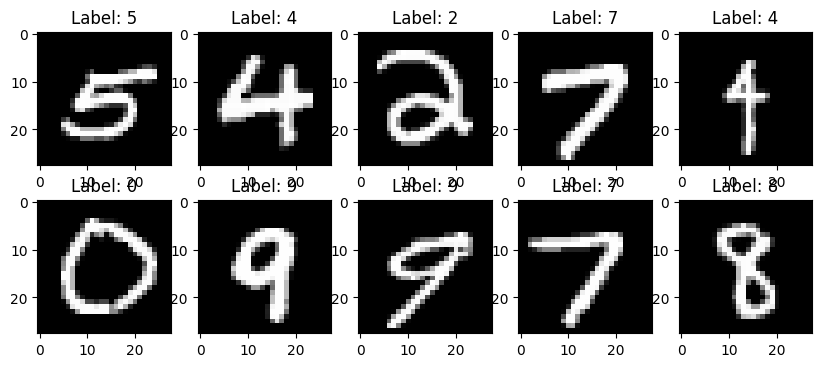

In [10]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f'Label: {labels[i]}')
plt.show()

### Preparing the data

In [11]:
import numpy as np

# Extract and flatten training data
X_train, y_train = [], []
for images, labels in train_loader:
    X_train.append(flatten_images(images).numpy())
    y_train.append(labels.numpy())
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

# Extract and flatten test data
X_test, y_test = [], []
for images, labels in test_loader:
    X_test.append(flatten_images(images).numpy())
    y_test.append(labels.numpy())
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (60000, 784), Labels shape: (60000,)
Test data shape: (10000, 784), Labels shape: (10000,)


### Showing label distribution

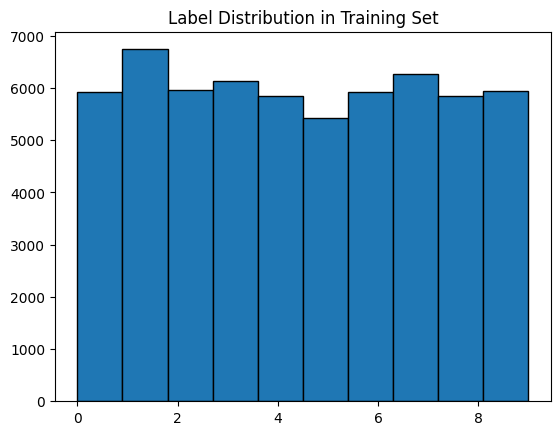

In [12]:
plt.hist(y_train, bins=10, edgecolor='black')
plt.title("Label Distribution in Training Set")
plt.show()

### Training SVM with rbf kernel and showing accuracies

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Train SVM classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Compute metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='macro')

# Print metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

Training Accuracy: 0.9899
Testing Accuracy: 0.9792
F1 Score (Macro): 0.9791


### Visualising Confusion Matrix

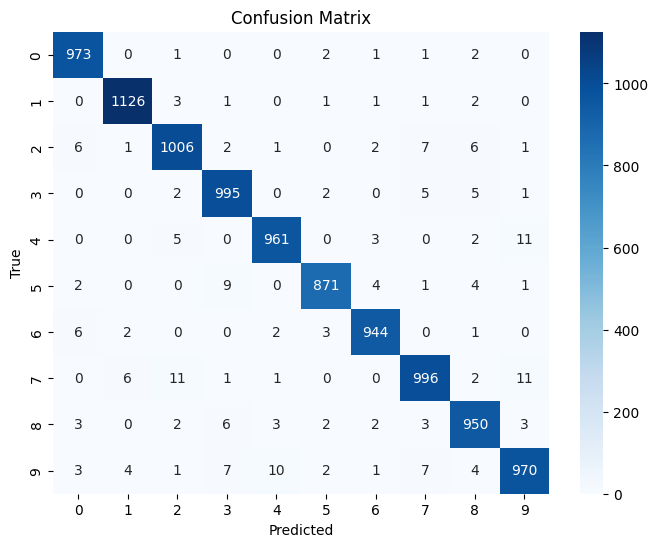

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_test_pred))

### showing some misclassified results

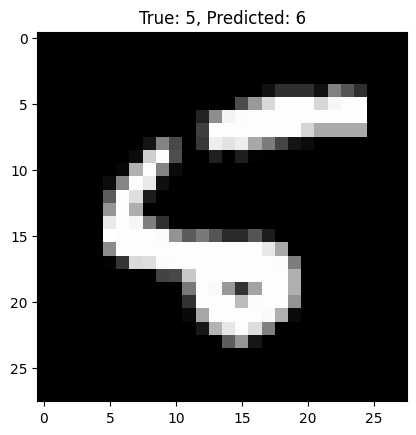

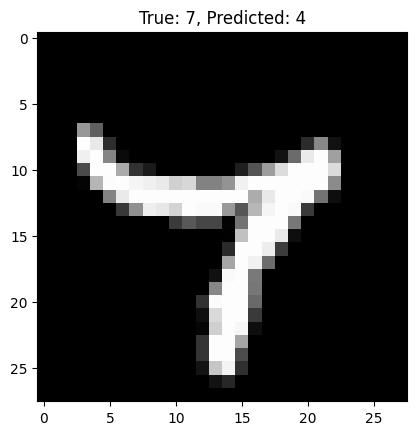

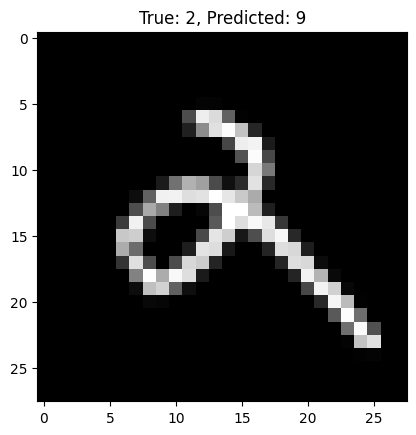

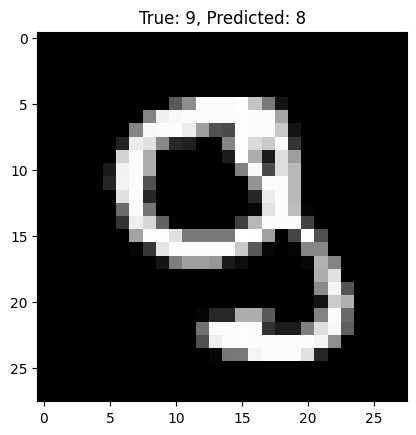

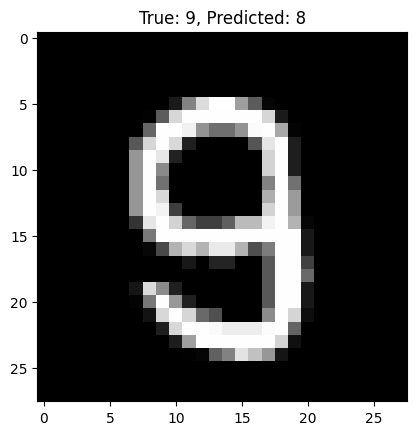

In [15]:
misclassified_idx = np.where(y_test != y_test_pred)[0]
for idx in misclassified_idx[:5]:
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_test_pred[idx]}")
    plt.show()